In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def soft_focal_weight(p, gamma, eps=0):
    return eps + (1-eps) * (1 - p) ** gamma

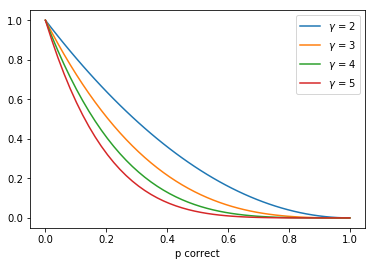

In [3]:
p = np.linspace(0, 1, 50)
gammas = [2, 3, 4, 5]
for gamma in gammas:
    w = soft_focal_weight(p, gamma)
    plt.plot(p, w, label="$\gamma$ = %s" % gamma)
plt.legend()
plt.xlabel("p correct")
plt.show()

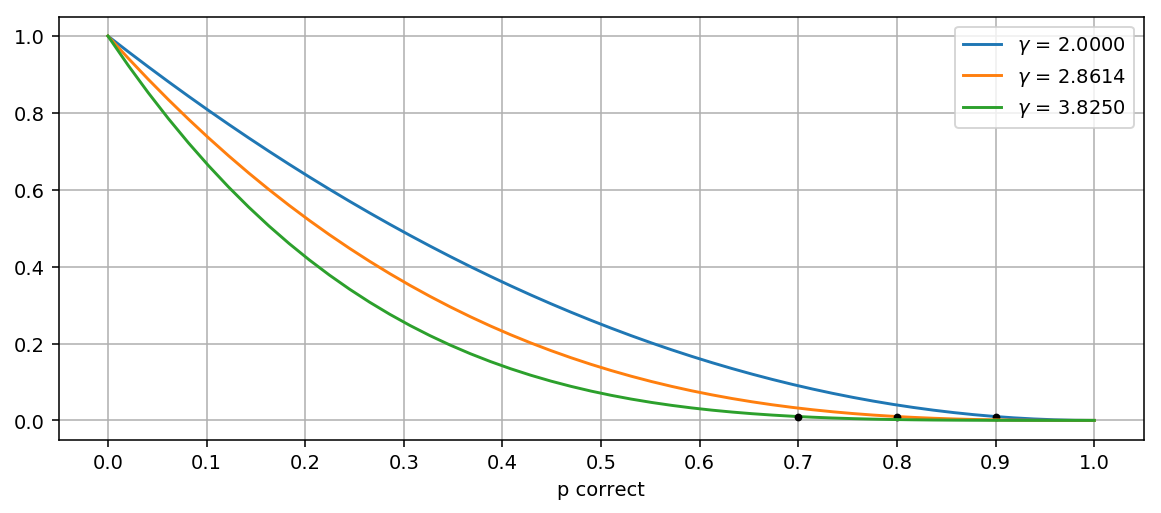

In [10]:
# linear spacing of effective "ignorance" width
delta = 0.01  # tolerance
widths = np.array([0.1, 0.2, 0.3])
gammas = np.log(delta) / np.log(widths)

plt.figure(figsize=(10, 4), dpi=140)
for width, gamma in zip(widths, gammas):
    w = soft_focal_weight(p, gamma)
    dot = soft_focal_weight(1-width, gamma)
    plt.plot(p, w, label="$\gamma$ = %1.4f" % gamma)
    plt.plot(1-width, dot, marker='o', markersize=3, color='k')
plt.legend()
plt.xlabel("p correct")
plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

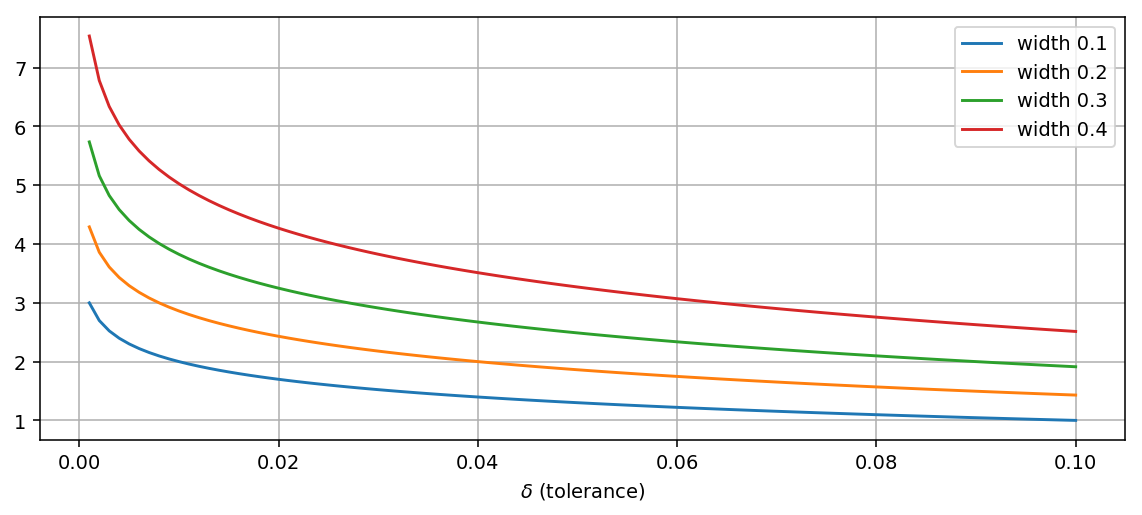

In [5]:
deltas = np.linspace(0.001, 0.1, 100)
widths = np.array([0.1, 0.2, 0.3, 0.4])
gammas_all = []
for delta in deltas:
    gammas = np.log(delta) / np.log(widths)
    gammas_all.append(gammas)
gammas_all = np.stack(gammas_all, axis=0)

plt.figure(figsize=(10, 4), dpi=140)
for j in range(widths.size):
    plt.plot(deltas, gammas_all[:, j], label="width %s" % widths[j])
plt.legend()
plt.xlabel("$\delta$ (tolerance)")
plt.grid()
plt.show()

In [6]:
chosen_delta = 0.01

chosen_loc = np.argmin((deltas - chosen_delta) ** 2)
print("Delta %1.4f, gammas: %s" % (deltas[chosen_loc], gammas_all[chosen_loc, :]))

Delta 0.0100, gammas: [2.         2.86135312 3.82497858 5.02588319]


In [7]:
chosen_delta = 0.02

chosen_loc = np.argmin((deltas - chosen_delta) ** 2)
print("Delta %1.4f, gammas: %s" % (deltas[chosen_loc], gammas_all[chosen_loc, :]))

Delta 0.0200, gammas: [1.69897    2.43067656 3.24926194 4.26941239]
